# Chapter: Time Series Analysis: Concepts and Applications

## Topic: AR illustration

In [1]:
# import packages
import numpy as np, matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.ticker import MaxNLocator

plt.rcParams.update({'font.size': 14})
np.random.seed(100)

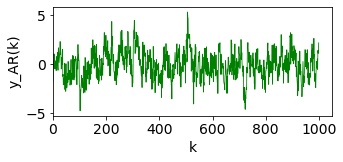

In [2]:
# generate data for AR(2) process
ar_coeffs = np.array([1, -0.3, -0.45]) # a1 = -0.3, a2 = -0.45
ARprocess = ArmaProcess(ar_coeffs)
y_AR = ARprocess.generate_sample(nsample=1000)

# plot
plt.figure(figsize=(5,2))
plt.plot(y_AR, 'g', linewidth=0.8)
plt.ylabel('y_AR(k)'), plt.xlabel('k'), plt.xlim(0)
plt.show()

C:\Users\f0ne44\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


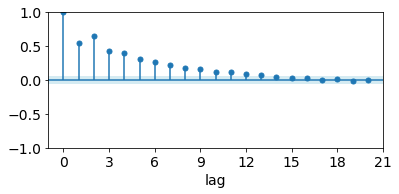

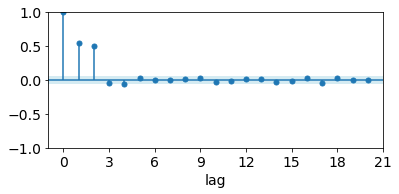

In [3]:
# generate ACF and PACF plots for y_AR
conf_int = 2/np.sqrt(len(y_AR))

fig, ax = plt.subplots(1,1,figsize=(6,2.5))
plot_acf(y_AR, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag')

fig, ax = plt.subplots(1,1,figsize=(6,2.5))
plot_pacf(y_AR, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag')
plt.show()

In [4]:
#%% Fit an AR(2) model
y_AR_centered = y_AR - np.mean(y_AR)
model = ARIMA(y_AR_centered, order=(2, 0, 0)) # order = (p,d,q)
results = model.fit()

# Print out summary information on the fit
print(results.summary())
# Print out the estimate for the parameters a1 and a2
print('[a1, a2] = ', -results.arparams)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1462.084
Date:                Tue, 16 May 2023   AIC                           2932.169
Time:                        22:45:10   BIC                           2951.800
Sample:                             0   HQIC                          2939.630
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.144      0.031      0.976      -0.277       0.286
ar.L1          0.2712      0.026     10.588      0.000       0.221       0.321
ar.L2          0.4990      0.028     17.981      0.0

In [5]:
#%% %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                         Residual analysis
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

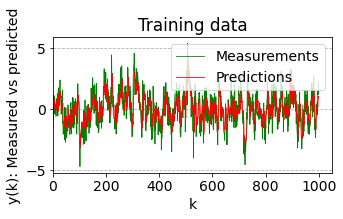

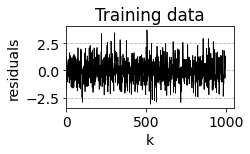

In [6]:
# get model predictions and residuals on training dataset
y_AR_centered_pred = results.predict()
residuals = y_AR_centered - y_AR_centered_pred

plt.figure(figsize=(5,2.5)), plt.title('Training data'), plt.plot(y_AR_centered, 'g', linewidth=0.8, label='Measurements')
plt.plot(y_AR_centered_pred, 'r', linewidth=0.8, label='Predictions')
plt.ylabel('y(k): Measured vs predicted'), plt.xlabel('k'), plt.legend(), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')

plt.figure(figsize=(3,1.5)), plt.plot(residuals, 'black', linewidth=0.8)
plt.title('Training data'), plt.ylabel('residuals'), plt.xlabel('k'), plt.xlim(0)
plt.grid(which='both', axis='y', linestyle='--')
plt.show()

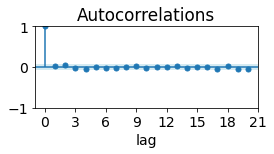

In [7]:
# ACF residuals
fig, ax = plt.subplots(1,1,figsize=(4,1.5))
plot_acf(residuals, lags= 20, alpha=None, title='', ax=ax)
plt.gca().axhspan(-conf_int, conf_int, facecolor='lightblue', alpha=0.5) # shaded confidence interval
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True)) # integer xtick labels
plt.xlabel('lag'), plt.title('Autocorrelations')
plt.show()